In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis 

In [42]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [43]:
#Check if category exists and not empty

if "category" in df.columns:
    print(df["category"].isnull().sum())
else:
    print("Column 'category' not found in dataset.")

0


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


In [48]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Check for unique values in 'isBestSeller'
print(df['isBestSeller'].unique())

# Ensure 'isBestSeller' is in a usable format (convert to numeric if needed)
df['isBestSeller'] = df['isBestSeller'].astype(str).str.lower().map({'yes': 1, 'no': 0, 'true': 1, 'false': 0})

# Drop NaN values that may have been introduced
df = df.dropna(subset=['isBestSeller'])

# Create a crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sort by best-seller proportion in descending order
sorted_crosstab = crosstab.sort_values(by=1, ascending=False)  # 1 represents best-sellers

# Display results
print(sorted_crosstab)


[False  True]
isBestSeller                           0         1
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339
...                                  ...       ...
Power Supplies                  1.000000  0.000000
Ski Helmets                     1.000000  0.000000
Ski Goggles                     1.000000  0.000000
Snowboard Boots                 1.000000  0.000000
eBook Readers & Accessories     1.000000  0.000000

[296 rows x 2 columns]


In [50]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Convert 'isBestSeller' to binary if needed
df['isBestSeller'] = df['isBestSeller'].astype(str).str.lower().map({'yes': 1, 'no': 0, 'true': 1, 'false': 0})

# Drop NaN values
df = df.dropna(subset=['isBestSeller', 'category'])

# Create a contingency table
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Compute Cramér's V
n = contingency_table.sum().sum()  # Total sample size
k = min(contingency_table.shape)  # Min number of categories
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

# Print results
print(f"Chi-square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Best-seller status and category are dependent.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")


Chi-square Statistic: 36540.2027
P-value: 0.0000
Cramér's V: 0.1223
Reject the null hypothesis: Best-seller status and category are dependent.


<Figure size 1400x800 with 0 Axes>

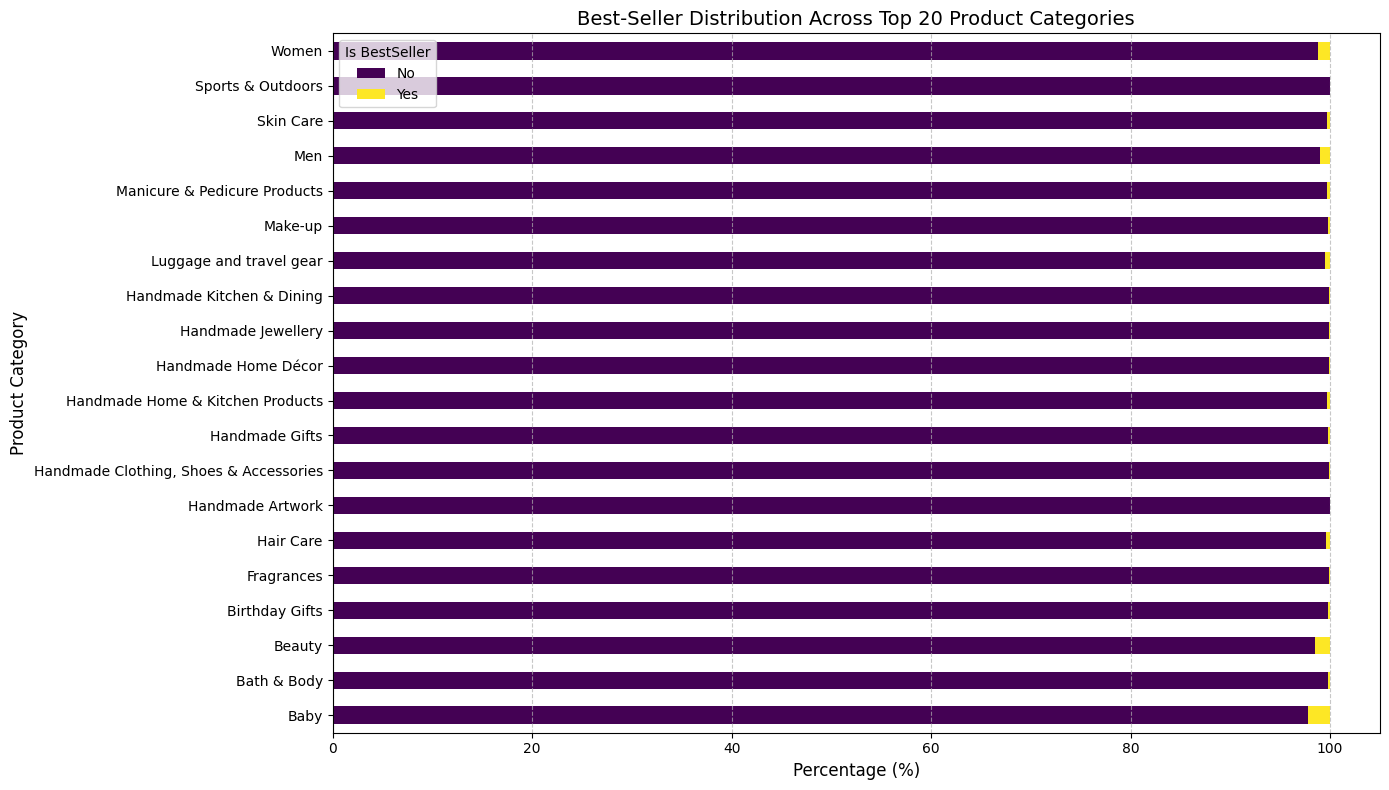

In [57]:
import matplotlib.pyplot as plt

# Get the top 20 categories by the number of products
top_categories = df['category'].value_counts().index[:20]  
filtered_df = df[df['category'].isin(top_categories)]  

# Re-create crosstab for filtered categories
category_counts = pd.crosstab(filtered_df['category'], filtered_df['isBestSeller'], normalize='index') * 100  

# Plot stacked bar chart
plt.figure(figsize=(14, 8))  # Increase figure size
category_counts.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')

# Improve labels and formatting
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Best-Seller Distribution Across Top 20 Product Categories", fontsize=14)
plt.legend(title="Is BestSeller", labels=["No", "Yes"])
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Grid on x-axis for clarity
plt.tight_layout()  # Adjust layout to prevent cutoff

# Show the plot
plt.show()


Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [62]:
# Drop rows with missing price values
df = df.dropna(subset=['price'])

# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for acceptable price range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the number of removed outliers
print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_filtered)}")
print(f"Number of outliers removed: {len(df) - len(df_filtered)}")

# Now, use df_filtered for further analysis


Original dataset size: 2443651
Filtered dataset size: 2115963
Number of outliers removed: 327688


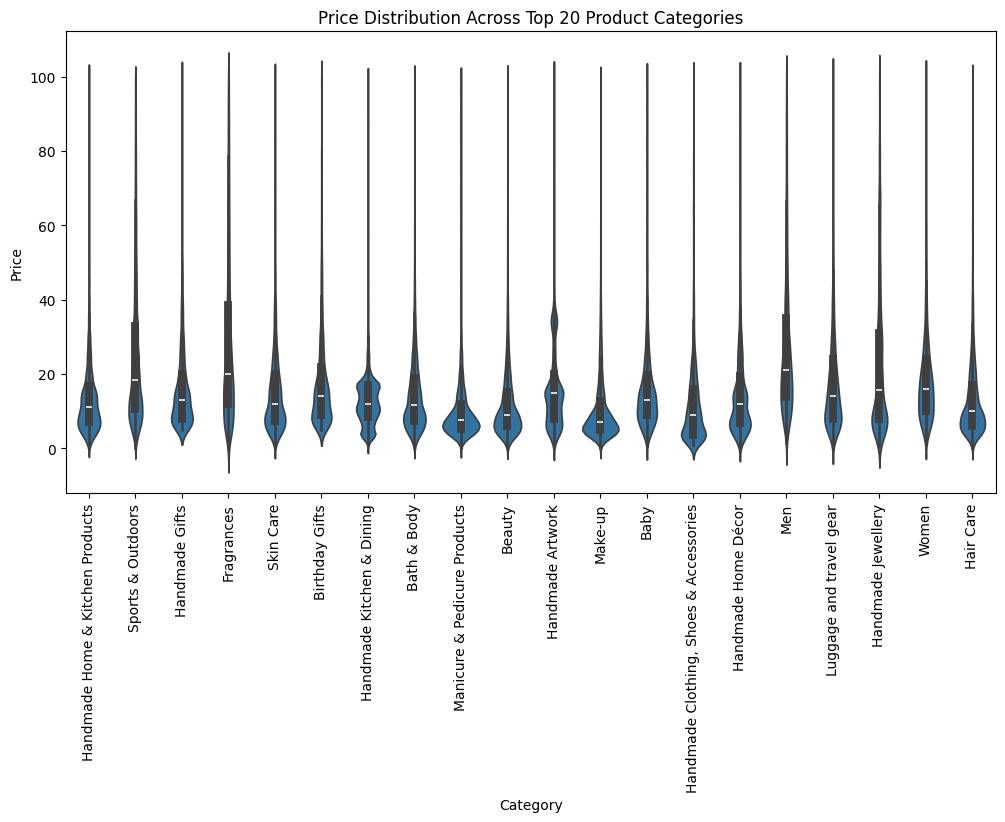

Product category with the highest median price: Desktop PCs (£74.00)


In [66]:


# Get top 20 categories by count
top_categories = df_filtered['category'].value_counts().nlargest(20).index
df_top = df_filtered[df_filtered['category'].isin(top_categories)]

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_top)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Top 20 Product Categories")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

# Find the category with the highest median price
median_prices = df_filtered.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"Product category with the highest median price: {highest_median_category} (£{highest_median_price:.2f})")


C:\Users\pboat\AppData\Local\Temp\ipykernel_1780\1663886559.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")


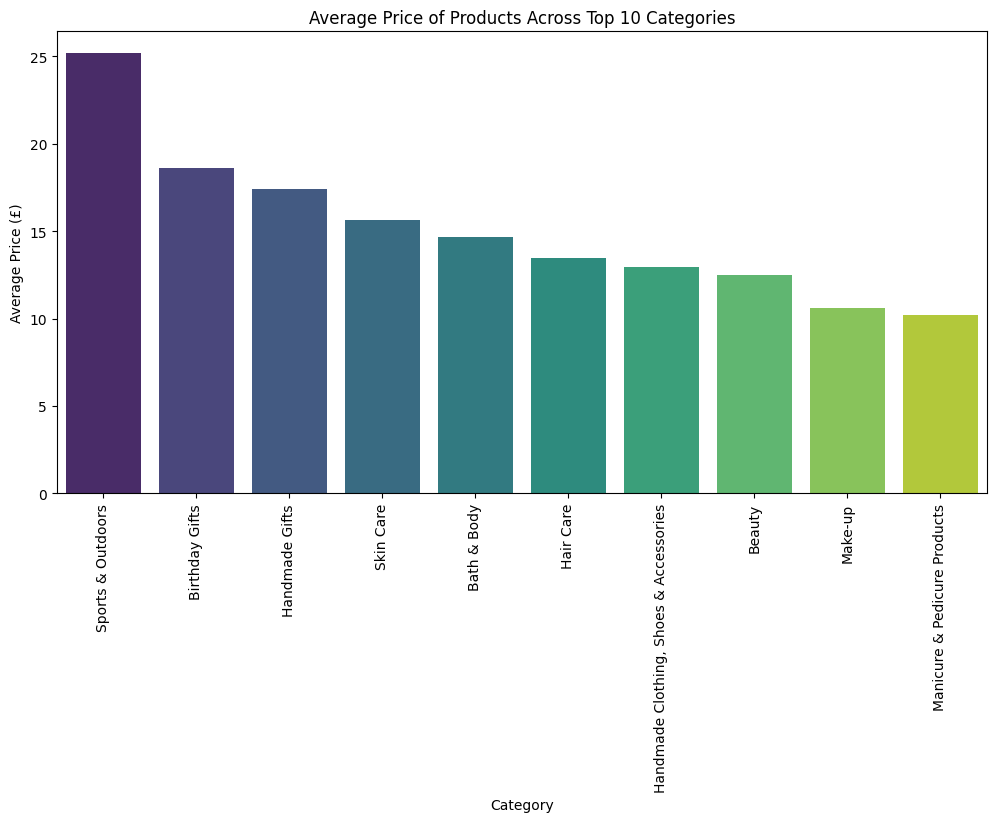

Product category with the highest average price: Motherboards (£68.77)


In [68]:
# Get top 10 categories by count
top_categories = df_filtered['category'].value_counts().nlargest(10).index
df_top = df_filtered[df_filtered['category'].isin(top_categories)]

# Calculate average price for the top 10 categories
avg_prices = df_top.groupby('category')['price'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Price of Products Across Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Average Price (£)")
plt.show()

# Find the category with the highest average price (without filtering)
highest_avg_price_category = df_filtered.groupby('category')['price'].mean().idxmax()
highest_avg_price = df_filtered.groupby('category')['price'].mean().max()

print(f"Product category with the highest average price: {highest_avg_price_category} (£{highest_avg_price:.2f})")

C:\Users\pboat\AppData\Local\Temp\ipykernel_1780\1987190647.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top, palette="coolwarm")


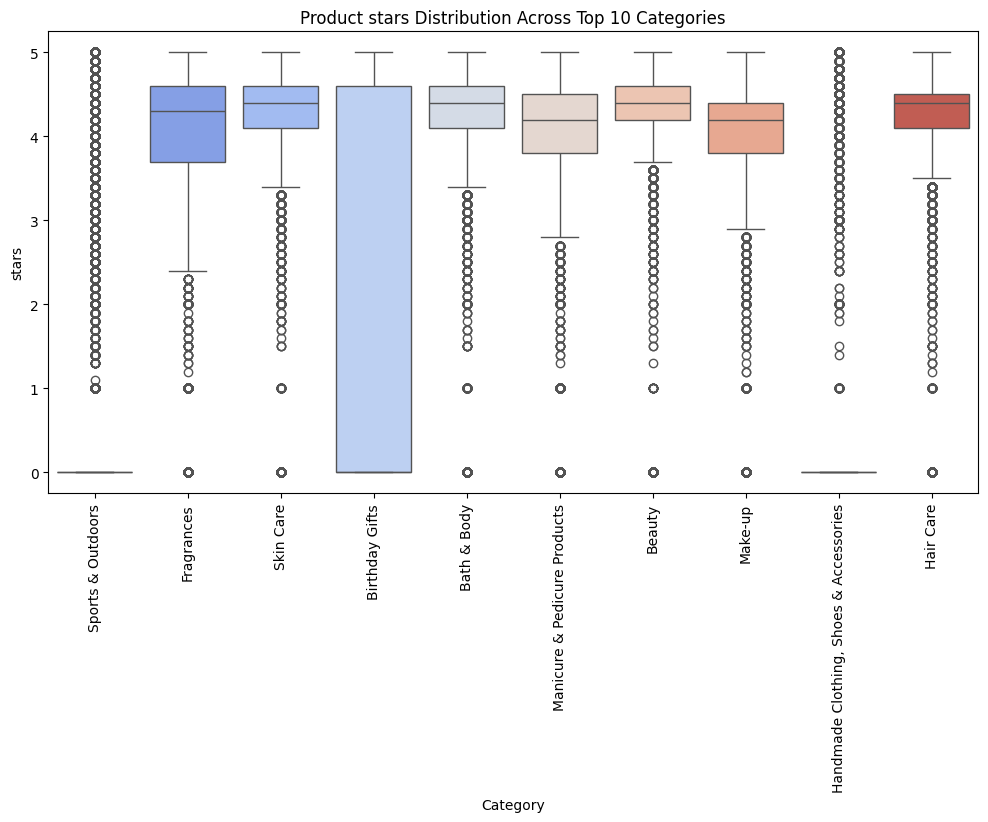

Product category with the highest median rating: Computer Memory (4.70)


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Strip column names to remove unwanted spaces
df.columns = df.columns.str.strip()

# Check if 'rating' exists
if 'stars' not in df.columns:
    raise ValueError("Column 'stars' not found in dataset. Check column names.")

# Ensure 'rating' is numeric
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows with missing ratings
df = df.dropna(subset=['stars'])

# Get top 10 categories by count
top_categories = df['category'].value_counts().nlargest(10).index
df_top = df[df['category'].isin(top_categories)]

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df_top, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Product stars Distribution Across Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("stars")
plt.show()

# Find the category with the highest median rating (without filtering)
median_ratings = df.groupby('category')['stars'].median()
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"Product category with the highest median rating: {highest_median_category} ({highest_median_rating:.2f})")


In [80]:


# Strip column names to remove unwanted spaces
df.columns = df.columns.str.strip()

# Ensure 'price' and 'rating' are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows with missing values in 'price' or 'rating'
df = df.dropna(subset=['price', 'stars'])

# Calculate correlation coefficient (Pearson)
correlation, p_value = stats.pearsonr(df['price'], df['stars'])

print(f"Correlation coefficient between price and rating: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between product price and stars.")
else:
    print("There is no statistically significant correlation between product price and stars.")


Correlation coefficient between price and rating: -0.1249
P-value: 0.0000
There is a statistically significant correlation between product price and stars.


Unique non-numeric values in 'price': [ 21.99  23.99  31.99  17.99  39.99  29.99 139.    49.99  64.99  26.99]
Unique non-numeric values in 'stars': [4.7 4.6 4.5 4.8 0.  4.4 4.3 4.1 4.9 5. ]


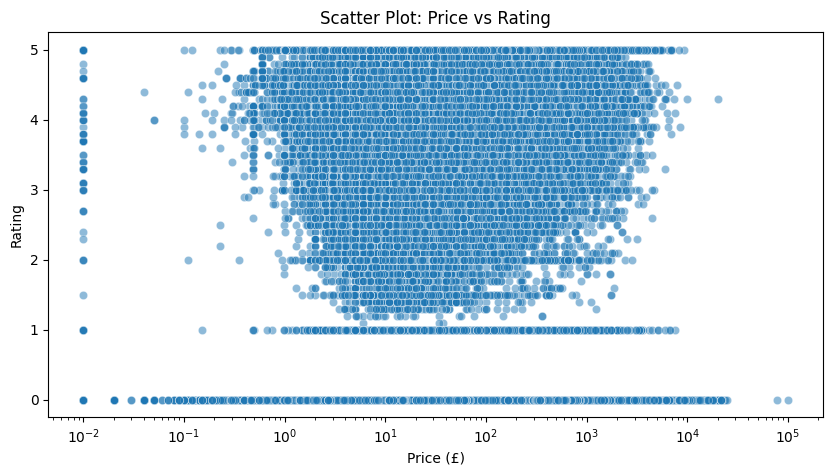

ValueError: could not convert string to float: 'B09B96TG33'

<Figure size 800x600 with 0 Axes>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Strip column names to remove unwanted spaces
df.columns = df.columns.str.strip()

# Check for non-numeric values in 'price' and 'rating'
print("Unique non-numeric values in 'price':", df['price'].unique()[:10])  # Check first 10 unique values
print("Unique non-numeric values in 'stars':", df['stars'].unique()[:10])  # Check first 10 unique values

# Convert 'price' and 'rating' to numeric, forcing errors='coerce' (non-convertible values become NaN)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop missing values after conversion
df = df.dropna(subset=['price', 'stars'])

# ---------------- SCATTER PLOT ----------------
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['price'], y=df['stars'], alpha=0.5)
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Price (£)")
plt.ylabel("Rating")
plt.title("Scatter Plot: Price vs Rating")
plt.show()

# ---------------- CORRELATION HEATMAP ----------------
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ---------------- QQ PLOT ----------------
plt.figure(figsize=(6, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()
